In [2]:
import numpy as np
from google.colab import drive
import pandas as pd
import json

drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
master_bind_df = pd.read_csv("/content/drive/MyDrive/Project/master_bind.csv")

master_bind_df.head()

,SourceFile,Subject
0,D:/NetworkRail22/Barnes_Tagged/17_NR_11.04.202...,NaN
1,D:/NetworkRail22/Barnes_Tagged/17_NR_11.04.202...,NaN
2,D:/NetworkRail22/Barnes_Tagged/17_NR_11.04.202...,NaN
3,D:/NetworkRail22/Barnes_Tagged/17_NR_11.04.202...,placeID: 17
4,D:/NetworkRail22/Barnes_Tagged/17_NR_11.04.202...,placeID: 17


In [4]:
double_species_count = 0

for i in range(len(master_bind_df)):
  subject = str(master_bind_df.iloc[i]['Subject'])
  if 'species2' in subject:
    double_species_count += 1

print(f'{double_species_count = }')

double_species_count = 14387


In [5]:
import pandas as pd
import re
import numpy as np

# Initialize lists to store data for the new DataFrame
place_ids = []
species = []
source_files = []

# Loop through the DataFrame
for index, row in master_bind_df.iterrows():
    subject = row['Subject']

    if pd.isna(subject):  # Check for NaN values
        place_id = ''
        species_name = ''
    else:
        # Extracting PlaceID
        place_id_match = re.search(r'placeID: (\d+)', subject)
        if place_id_match:
            place_id = place_id_match.group(1)
        else:
            place_id = ''

        # Check if 'species2' is present
        if 'species2' in subject:
            species_name = ''  # If 'species2' is present, leave 'Species' empty
        else:
            # Extracting Species
            species_match = re.search(r'species1: ([^,]+)', subject)
            if species_match:
                species_name = species_match.group(1)
            else:
                species_name = ''

    # Append to lists
    place_ids.append(place_id)
    species.append(species_name)
    source_files.append(row['SourceFile'])

# Create a new DataFrame
new_df = pd.DataFrame({
    'SourceFile': source_files,
    'PlaceID': place_ids,
    'Subject': species
})

# Print the new DataFrame
print(new_df)



                                               SourceFile PlaceID Subject
0       D:/NetworkRail22/Barnes_Tagged/17_NR_11.04.202...                
1       D:/NetworkRail22/Barnes_Tagged/17_NR_11.04.202...                
2       D:/NetworkRail22/Barnes_Tagged/17_NR_11.04.202...                
3       D:/NetworkRail22/Barnes_Tagged/17_NR_11.04.202...      17        
4       D:/NetworkRail22/Barnes_Tagged/17_NR_11.04.202...      17        
...                                                   ...     ...     ...
580147  E:/2022/Richmond_IoT/RiffleClub/RC_tagged/LHW_...                
580148  E:/2022/Richmond_IoT/RiffleClub/RC_tagged/exif...                
580149  E:/2022/Richmond_IoT/RiffleClub/RC_tagged/IoT_...                
580150  E:/2022/Richmond_IoT/RiffleClub/RC_tagged/IoT_...                
580151  E:/2022/Richmond_IoT/RiffleClub/RC_tagged/IoT_...                

[580152 rows x 3 columns]


In [ ]:
new_df.to_csv('/content/drive/MyDrive/Project/SepCol_master_bind.csv', index=False)

In [6]:
# Initialize a dictionary to store unique entries and their counts
subject_counts = {}

for subject in new_df['Subject']:
    if isinstance(subject, str) and subject.strip():  # Check if the subject is a non-empty string
        if subject not in subject_counts:
            subject_counts[subject] = 1
        else:
            subject_counts[subject] += 1

# Print the unique entries and their counts
for subject, count in subject_counts.items():
    print(f"{subject}: {count}")


Fox: 63039
Cat: 3997
Squirrel: 60022
Rat: 5606
Dunnock: 356
Robin: 3100
Hedgehog: 1188
Great_tit: 213
Dog: 45238
Wren: 313
Mouse: 8011
Blackbird: 2554
Magpie: 5314
Badger: 1696
Wood_pigeon: 14961
Crow: 4164
Redwing: 207
Woodpigeon: 88
Jay: 805
Chaffinch: 17
Song_thrush: 1046
Feral_pigeon: 15
Moorhen: 2979
Tawny_owl: 13
Blackcap: 8
Sparrow: 22
Stock_dove: 198
Human: 598
Chiffchaff: 3
Rock_dove: 147
Muntjac: 2289
Moth: 2
Jackdaw: 24
Rabbit: 782
Horse: 5
Nuthatch: 5
Great_Spotted_Woodpecker: 4
Mallard: 104
Thrush: 490
Bee: 7
Willow_warbler: 147
Starling: 21
Green_woodpecker: 69
Siskin: 1
Greenfinch: 11
Egyptian_goose: 14
Great_spotted_woodpecker: 5
Pied_wagtail: 3
Blue_tit: 4
Stonechat: 1
Collared_dove: 20
Heron: 25
Song_Thrush: 168
Carrion_Crow: 3
Great_Tit: 12
Tawny owl: 3
Song thrush: 55
Black_cap: 3
SBJ: 2
Tufted_duck: 1
Canada_goose: 9
Songthrush: 50
Kingfisher: 2
Coot: 2
Grass_snake: 3
Unidentified: 17
Grey_heron: 31
Mink: 1
Unknown: 15


In [14]:
for k, v in sorted(subject_counts.items(), key=lambda item: item[0]):
    print(k, v)

Badger 1696
Bee 7
Black_cap 3
Blackbird 2554
Blackcap 8
Blue_tit 4
Canada_goose 9
Carrion_Crow 3
Cat 3997
Chaffinch 17
Chiffchaff 3
Collared_dove 20
Coot 2
Crow 4164
Dog 45238
Dunnock 356
Egyptian_goose 14
Feral_pigeon 15
Fox 63039
Grass_snake 3
Great_Spotted_Woodpecker 4
Great_Tit 12
Great_spotted_woodpecker 5
Great_tit 213
Green_woodpecker 69
Greenfinch 11
Grey_heron 31
Hedgehog 1188
Heron 25
Horse 5
Human 598
Jackdaw 24
Jay 805
Kingfisher 2
Magpie 5314
Mallard 104
Mink 1
Moorhen 2979
Moth 2
Mouse 8011
Muntjac 2289
Nuthatch 5
Pied_wagtail 3
Rabbit 782
Rat 5606
Redwing 207
Robin 3100
Rock_dove 147
SBJ 2
Siskin 1
Song thrush 55
Song_Thrush 168
Song_thrush 1046
Songthrush 50
Sparrow 22
Squirrel 60022
Starling 21
Stock_dove 198
Stonechat 1
Tawny owl 3
Tawny_owl 13
Thrush 490
Tufted_duck 1
Unidentified 17
Unknown 15
Willow_warbler 147
Wood_pigeon 14961
Woodpigeon 88
Wren 313


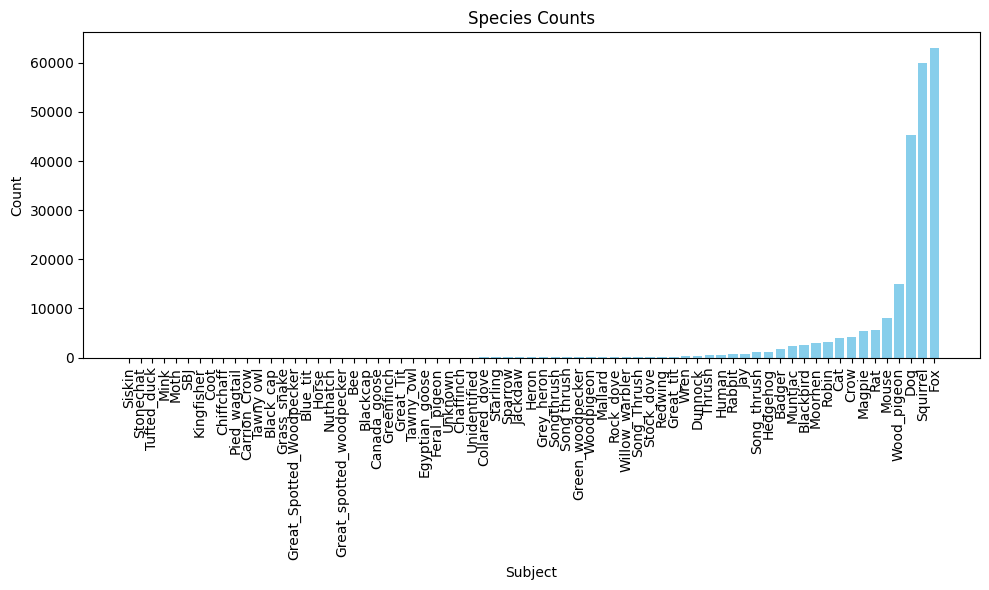

In [9]:
import matplotlib.pyplot as plt


subject_counts = {k: v for k, v in sorted(subject_counts.items(), key=lambda item: item[1])}
plt.figure(figsize=(10, 6))
plt.bar(subject_counts.keys(), subject_counts.values(), color='skyblue')
plt.xlabel('Subject')
plt.ylabel('Count')
#plt.yscale('log')
plt.title('Species Counts')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

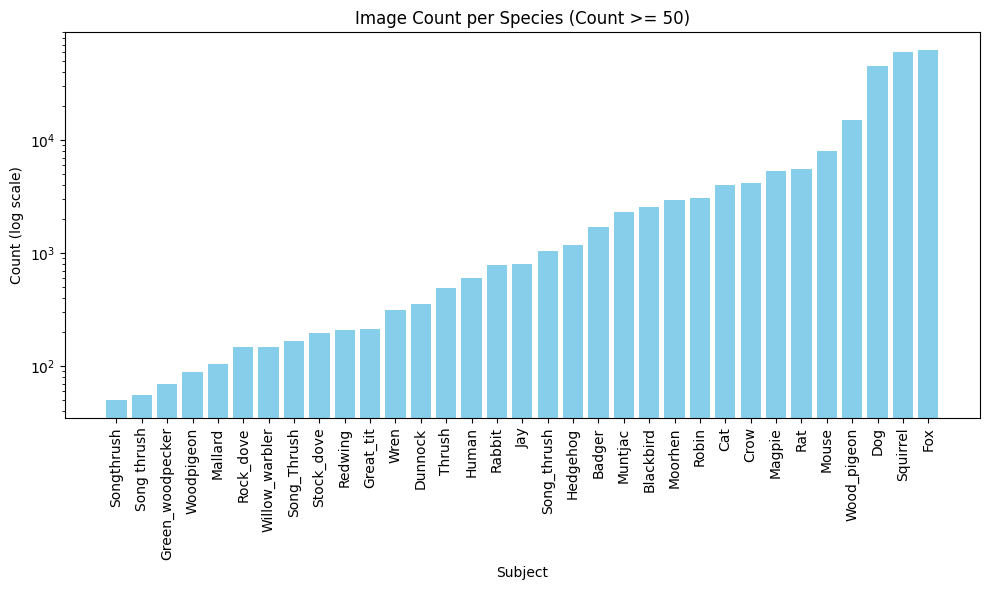

In [11]:
subject_counts_filtered = {k: v for k, v in subject_counts.items() if v >= 50}
subject_counts_filtered = {k: v for k, v in sorted(subject_counts_filtered.items(), key=lambda item: item[1])}
# Plotting the bar chart with log scale on y-axis
plt.figure(figsize=(10, 6))
plt.bar(subject_counts_filtered.keys(), subject_counts_filtered.values(), color='skyblue')
plt.yscale('log')  # Set y-axis scale to log
plt.xlabel('Subject')
plt.ylabel('Count (log scale)')
plt.title('Image Count per Species (Count >= 50)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()